In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from batty import BAT_sampler, BAT, Distributions

/mnt/c/Users/peller/work/batty/batty.py:6: UserWarning: Not able to use compiled modules, resulting in (very) slow import
 See https://pyjulia.readthedocs.io/en/latest/troubleshooting.html
  warnings.warn("Not able to use compiled modules, resulting in (very) slow import\n See https://pyjulia.readthedocs.io/en/latest/troubleshooting.html")


# Minimal Example

In [4]:
sampler = BAT_sampler(llh=lambda x : -0.5 * x**2, prior_specs=Distributions.Uniform(-3, 3))

In [5]:
result = sampler.sample(strategy=BAT.MCMCSampling(nsteps=1000))

In [109]:
result = sampler.sample(strategy=BAT.PriorImportanceSampler(nsamples=1000))

In [110]:
result = sampler.sample(strategy=BAT.SobolSampler(nsamples=1000))

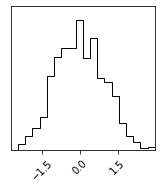

In [6]:
sampler.corner();

In [7]:
sampler.integrate(strategy=BAT.AHMIntegration())

0.40480402621723155+/-0.007978913857104968

# More Complicated Example

In [113]:
s = np.random.rand(2,2)
prior_specs = {'a' : Distributions.Uniform(-3,3), 'b' : Distributions.MvNormal([1,1], s@s.T), }

In [114]:
def llh(x, d):
    return -0.5 * ((x.b[0] - d[0])**2 + (x.b[1] - d[1])**2/4) - x.a

In [115]:
d = [-1, 1]

In [118]:
sampler = BAT_sampler(llh, prior_specs, llh_args=(d,), progress_bar=True)

In [124]:
%%time
sampler.sample(strategy=BAT.MCMCSampling(nsteps=1_000, nchains=2));

llh at    -1.3409: : 17316it [01:22, 204.29it/s]    

CPU times: user 1min 27s, sys: 12.6 s, total: 1min 39s
Wall time: 1min 22s


<Array [{weight: 5, logd: -1.24, v: {, ... ] type='460 * {"weight": int64, "logd...'>

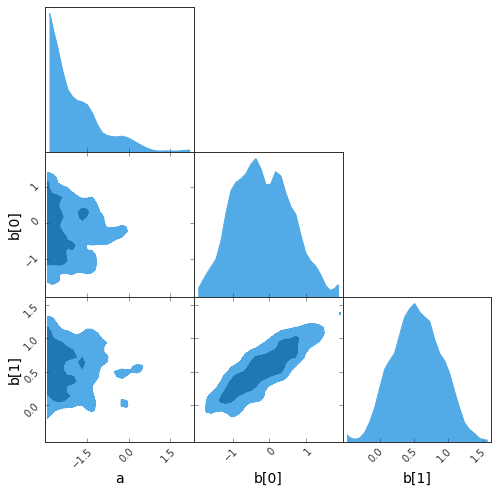

In [125]:
sampler.gtc(figureSize=8, customLabelFont={'size':14}, customTickFont={'size':10});

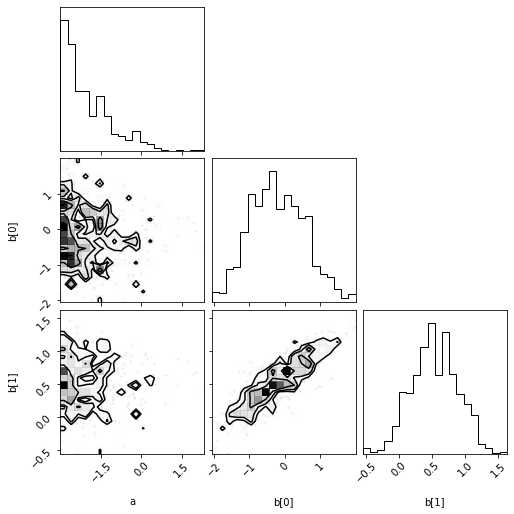

In [126]:
sampler.corner();

In [127]:
sampler.integrate(strategy=BAT.AHMIntegration())

0.9287857764971135+/-0.04926887895377298

In [128]:
sampler.integrate(strategy=BAT.BridgeSampling(), use_samples=True)

llh at     1.0543: : 19848it [01:47, 199.40it/s]

0.8934826652738317+/-0.016564129999293187

In [129]:
sampler.sample(strategy=BAT.SobolSampler(nsamples=100))

llh at    -0.2533: : 100it [00:01, 61.09it/s]

<Array [{weight: 0.135, logd: -4.08, ... ] type='100 * {"weight": float64, "logd...'>

In [130]:
sampler.sample(strategy=BAT.GridSampler(ppa=10))

llh at   -36.7612: : 1000it [00:05, 219.50it/s]

<Array [{weight: 0.00146, logd: -35.3, ... ] type='1000 * {"weight": float64, "l...'>

In [131]:
sampler.sample(strategy=BAT.PriorImportanceSampler(nsamples=100))

llh at    -6.7600: : 100it [00:01, 55.59it/s]

<Array [{weight: 0.483, logd: -2.89, ... ] type='100 * {"weight": float64, "logd...'>

In [143]:
sampler.sample(strategy=BAT.MCMCSampling(nsteps=100, nchains=2, mcalg=BAT.MetropolisHastings()));

llh at    -3.7241: : 10516it [00:28, 319.62it/s]     

In [ ]:
sampler.sample(strategy=BAT.MCMCSampling(nsteps=100, nchains=2, mcalg=BAT.MetropolisHastings(weighting=BAT.ARPWeighting()))

In [133]:
# does not work
#sampler.sample(strategy=BAT.MCMCSampling(nsteps=1000, nchains=2, mcalg=BAT.HamiltonianMC()));

In [134]:
#takes way too long
#sampler.sample(strategy=BAT.PartitionedSampling(npartitions=2, sampler=BAT.MCMCSampling(nchains=2, nsteps=100, strict=False), exploration_sampler=BAT.MCMCSampling(nchains=2, nsteps=100, strict=False)))